<a href="https://colab.research.google.com/github/PervejHosen/Learning-Python/blob/main/Class_06_(Rainfall_prediction_Using_Machine_Learning_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2.Read Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Class/4. Rainfall/Temp_and_rain.csv')


In [ ]:
df.shape

(1380, 4)

In [ ]:
df.head(5)

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [ ]:
df.tail(5)

,tem,Month,Year,rain
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815
1379,18.7124,12,2015,5.97798


# 3.Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.2 KB


In [ ]:
df.describe()

,tem,Month,Year,rain
count,1380.000000,1380.000000,1380.00000,1380.000000
mean,25.066213,6.500000,1958.00000,203.275431
std,3.682411,3.453304,33.20842,202.730898
min,16.800600,1.000000,1901.00000,0.000000
25%,22.114125,3.750000,1929.00000,18.498850
50%,27.012950,6.500000,1958.00000,145.086000
75%,28.007850,9.250000,1987.00000,347.639500
max,29.526000,12.000000,2015.00000,1012.020000


In [ ]:
df.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

In [ ]:
print(df.groupby('Month').size())

Month
1     115
2     115
3     115
4     115
5     115
6     115
7     115
8     115
9     115
10    115
11    115
12    115
dtype: int64


# 4.Vizulization

<Axes: xlabel='Year', ylabel='rain'>

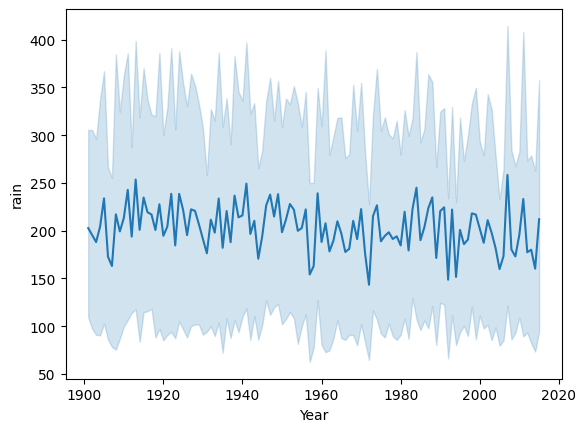

In [ ]:
sns.lineplot(data=df, x="Year", y="rain")

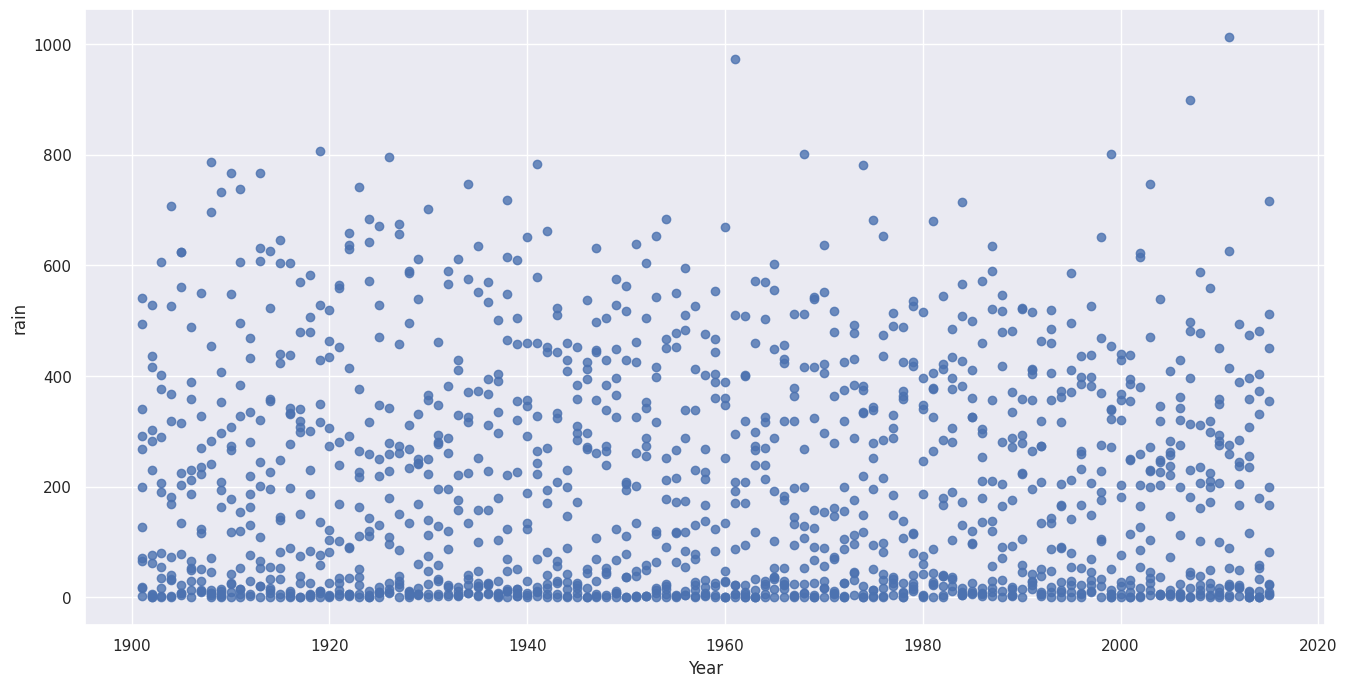

In [ ]:
sns.set()
plt.figure(figsize=(16,8))
sns.regplot(x = "Year",y="rain",fit_reg = False,data=df)
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
fig = px.pie(data_frame=df,values="rain",names='Month',labels= {"Month"},
             title="Pie chart of  Rain according to  Month")
fig.show()

Now let's separate our Month's according to different Seasons of Bangladesh

In [ ]:
mapping = {1 : "Winter",2:"Winter",12: "Winter",3:"Spring",10:"Late autumn",
           11:"Late autumn",8:"Autumn",9:"Autumn",6:"Rainy",7:"Rainy",4:"Summer",5:"Summer"}

df["Season"] = df["Month"].map(mapping).astype(str)

In [ ]:
df["Season"].value_counts()

Winter         345
Summer         230
Rainy          230
Autumn         230
Late autumn    230
Spring         115
Name: Season, dtype: int64

In [ ]:
df.head()

,tem,Month,Year,rain,Season
0,16.9760,1,1901,18.5356,Winter
1,19.9026,2,1901,16.2548,Winter
2,24.3158,3,1901,70.7981,Spring
3,28.1834,4,1901,66.1616,Summer
4,27.8892,5,1901,267.2150,Summer


In [ ]:
fig = px.pie(data_frame=df,values="rain",names='Season',labels= {"Season"},
             title="Pie chart of Rain according to  Season")
fig.show()

In [ ]:
print(df[df['tem']==df['tem'].max()])
print(df[df['tem']==df['tem'].min()])

        tem  Month  Year     rain  Season
940  29.526      5  1979  116.378  Summer
         tem  Month  Year    rain  Season
924  16.8006      1  1978  0.6893  Winter


In [ ]:
print("Highest Temparature: ",df['tem'].max())
print("Lowest Temparature: ",df['tem'].min())

Highest Temparature:  29.526
Lowest Temparature:  16.8006


In [ ]:
#Max and Min Temperature per yrs
for i in range(2010,2016):
    print("Max value for Year ",i," is: ",df[df['Year']==i]['tem'].max())
    print("Min value for Year ",i," is: ",df[df['Year']==i]['tem'].min())
    print("____________________________________")

Max value for Year  2010  is:  29.1543
Min value for Year  2010  is:  18.6795
____________________________________
Max value for Year  2011  is:  28.5389
Min value for Year  2011  is:  18.0523
____________________________________
Max value for Year  2012  is:  28.7705
Min value for Year  2012  is:  16.8493
____________________________________
Max value for Year  2013  is:  28.894
Min value for Year  2013  is:  17.7546
____________________________________
Max value for Year  2014  is:  28.7169
Min value for Year  2014  is:  17.1088
____________________________________
Max value for Year  2015  is:  28.3603
Min value for Year  2015  is:  17.8343
____________________________________


In [ ]:
print(df[df['rain']==df['rain'].max()][['rain','tem','Month','Year',]])
print(df[df['rain']==df['rain'].min()][['rain','tem','Month','Year',]])

         rain      tem  Month  Year
1327  1012.02  28.0651      8  2011
     rain      tem  Month  Year
323   0.0  19.4851     12  1927


Highest rainfall: 1012 was recorded on August 2011

Lowest rainfall: 0 was on recorded December 1927

In [ ]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "Month", y = "rain", color="rain", title = "Measurement of Rain")
fig.show()

In [ ]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "Season", y = "rain", color="rain")
fig.show()

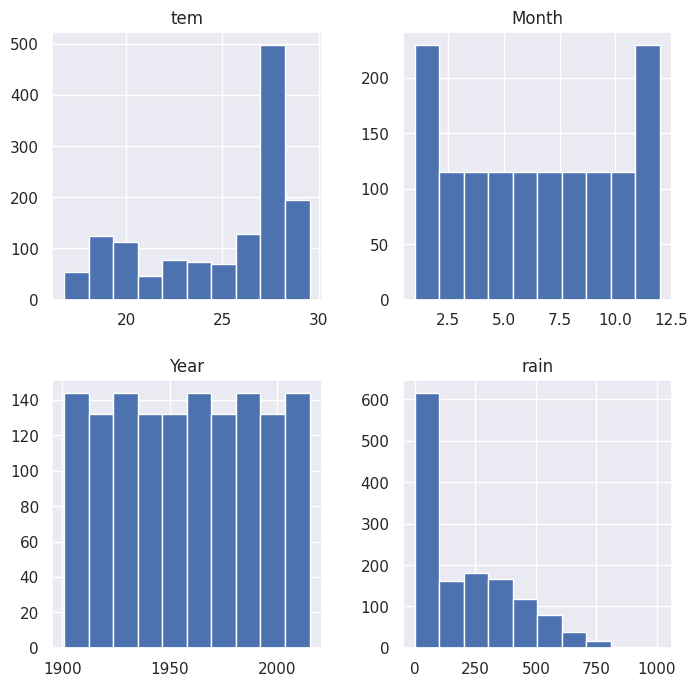

In [ ]:
df.hist(figsize= (8,8))
plt.show()

<ipython-input-36-cc80acf4307a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correaltions Heatmap')

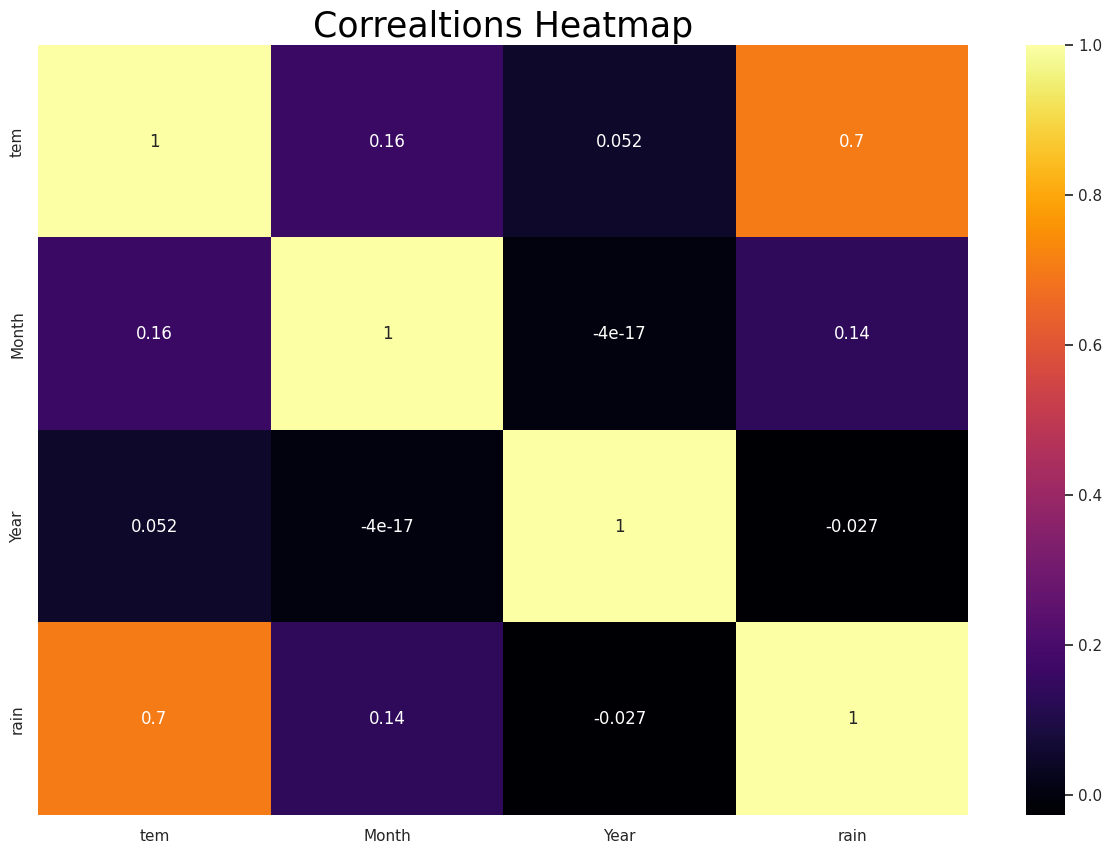

In [ ]:
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="inferno")
plt.title(label='Correaltions Heatmap',
          fontsize=25,
          color="black")

Text(0.5, 1.0, 'Outliner Distribution')

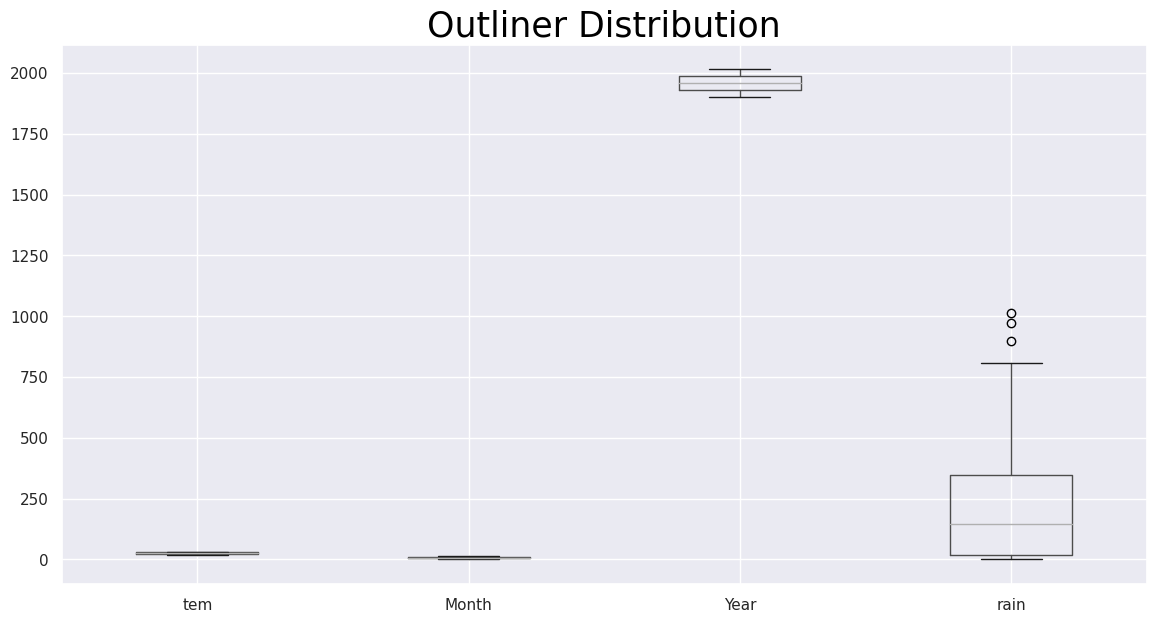

In [ ]:

df.boxplot(figsize=(14,7))
plt.title(label='Outliner Distribution',
          fontsize=25,
          color="Black")

In [ ]:
Q1 = df['rain'].quantile(0.25)
Q3 = df['rain'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower_limit', lower_limit)
print('upper_limit', upper_limit)
df['rain'] = np.where(
   df['rain'] > upper_limit,
   upper_limit,
   np.where(
       df['rain'] < lower_limit,
       lower_limit,
       df['rain']
    )
)


lower_limit -475.21212499999996
upper_limit 841.350475


Text(0.5, 1.0, 'Outliner Distribution')

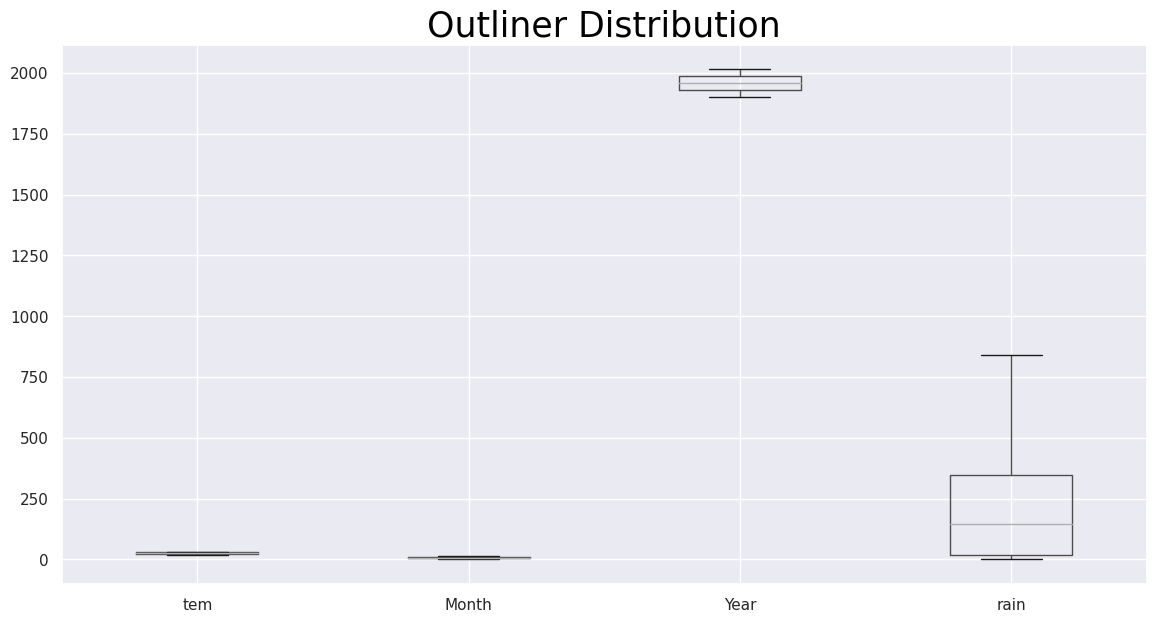

In [ ]:
df.boxplot(figsize=(14,7))
plt.title(label='Outliner Distribution',
          fontsize=25,
          color="Black")